## NOW OUR AIM IS TO FIND SIMILAR PATTERNS WITH THE TIME SERIES RELATED TO THE AQI_1 (daily average) VARIABLE. 

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [2]:
%run setup.ipynb

In [3]:
df = pd.read_csv(f'{RESULTS_PATH}/combined_df.csv', header=[0,1])

In [4]:
df.columns = df.columns.droplevel(1)

In [5]:
df['DATA']=pd.to_datetime(df['DATA'])

In [6]:
df['AQI_1'] = df['AQI_1'].apply(pd.to_numeric, errors='coerce')

In [7]:
print(df.iloc[:,13][df['DATA']=='2020-2-29'])
#here we're seeing the NaN for all the provinces in the 29 february 2020

789     NaN
2097    NaN
3405    NaN
4713    NaN
6021    NaN
7329    NaN
8637    NaN
9945    NaN
11253   NaN
12561   NaN
13869   NaN
15177   NaN
Name: AQI_1, dtype: float64


In [8]:
rows_to_drop = df[df['DATA'] == '2020-02-29'].index
#Delete the 2020-02-29 row
df.drop(rows_to_drop, inplace=True)

In [9]:
new_X = df[['DATA', 'PROV', 'AQI_1']].copy()

In [10]:
print(new_X[new_X['DATA']=='2020-12-29'])
print(new_X[new_X['DATA']=='2020-12-30'])
print(new_X[new_X['DATA']=='2020-12-31'])
#for 29, 30, 31 december we have NaN

            DATA  PROV  AQI_1
1093  2020-12-29   138    NaN
2401  2020-12-29   148    NaN
3709  2020-12-29    77    NaN
5017  2020-12-29   133    NaN
6325  2020-12-29   243    NaN
7633  2020-12-29   205    NaN
8941  2020-12-29   186    NaN
10249 2020-12-29   113    NaN
11557 2020-12-29    64    NaN
12865 2020-12-29    84    NaN
14173 2020-12-29    60    NaN
15481 2020-12-29    55    NaN
            DATA  PROV  AQI_1
1094  2020-12-30   138    NaN
2402  2020-12-30   148    NaN
3710  2020-12-30    77    NaN
5018  2020-12-30   133    NaN
6326  2020-12-30   243    NaN
7634  2020-12-30   205    NaN
8942  2020-12-30   186    NaN
10250 2020-12-30   113    NaN
11558 2020-12-30    64    NaN
12866 2020-12-30    84    NaN
14174 2020-12-30    60    NaN
15482 2020-12-30    55    NaN
            DATA  PROV  AQI_1
1095  2020-12-31   138    NaN
2403  2020-12-31   148    NaN
3711  2020-12-31    77    NaN
5019  2020-12-31   133    NaN
6327  2020-12-31   243    NaN
7635  2020-12-31   205    NaN
8943  2020

In [11]:
## imputation for these dates
province_list = new_X['PROV'].unique() 
for provincia in province_list:
    missing_data = new_X[(new_X['DATA'].dt.year == 2020) & (new_X['DATA'].dt.month == 12) & (new_X['DATA'].dt.day.isin([29,30,31])) & (new_X['PROV']==provincia) & new_X['AQI_1'].isnull()]   
    for index, row in missing_data.iterrows():
        day = row['DATA'].day
        month = row['DATA'].month
        # Compute mean of the same days for the two previous years
        average_2019 = new_X[(new_X['DATA'].dt.year == 2019) & (new_X['DATA'].dt.month == month) & (new_X['DATA'].dt.day == day) & (new_X['PROV']==provincia)]['AQI_1'].mean()
        average_2018 = new_X[(new_X['DATA'].dt.year == 2018) & (new_X['DATA'].dt.month == month) & (new_X['DATA'].dt.day == day) & (new_X['PROV']==provincia)]['AQI_1'].mean()
        # Compute mean of the two means
        imputed_value = (average_2019 + average_2018) / 2
        # Impute the value
        new_X.at[index, 'AQI_1'] = imputed_value 

In [12]:
print(new_X[new_X['DATA']=='2020-12-29'])
print(new_X[new_X['DATA']=='2020-12-30'])
print(new_X[new_X['DATA']=='2020-12-31'])
## now the NaN have been imputated

            DATA  PROV   AQI_1
1093  2020-12-29   138  34.890
2401  2020-12-29   148  27.920
3709  2020-12-29    77  25.175
5017  2020-12-29   133  46.470
6325  2020-12-29   243  30.300
7633  2020-12-29   205  30.320
8941  2020-12-29   186  39.790
10249 2020-12-29   113  37.780
11557 2020-12-29    64  35.995
12865 2020-12-29    84  26.685
14173 2020-12-29    60  40.015
15481 2020-12-29    55  42.860
            DATA  PROV   AQI_1
1094  2020-12-30   138  27.655
2402  2020-12-30   148  27.590
3710  2020-12-30    77  28.695
5018  2020-12-30   133  30.935
6326  2020-12-30   243  30.780
7634  2020-12-30   205  33.105
8942  2020-12-30   186  29.235
10250 2020-12-30   113  35.640
11558 2020-12-30    64  35.565
12866 2020-12-30    84  28.490
14174 2020-12-30    60  31.050
15482 2020-12-30    55  28.180
            DATA  PROV   AQI_1
1095  2020-12-31   138  28.575
2403  2020-12-31   148  27.430
3711  2020-12-31    77  29.185
5019  2020-12-31   133  37.555
6327  2020-12-31   243  29.940
7635  20

In [13]:
# modify the province identifier with the real province name
mappa_province = {
    55: 'Monza', #108
    60: 'Lodi', #098
    64: 'Mantova', #020
    77: 'Sondrio', #014
    84: 'Lecco', #097
    113: 'Cremona', #019
    133: 'Milano', #015
    138: 'Varese', #012
    148: 'Como', #013
    186: 'Pavia', #018
    205: 'Brescia', #017
    243: 'Bergamo',  #016
}
new_X['PROV'] = new_X['PROV'].map(mappa_province)

## PIE CHARTS

In [14]:
# Define a function to assign the category evaluating the interval in which the AQI value falls.
# Those intervals are defined by U.S. Environmental Protection Agency (EPA).
def assign_color(aqi):
    if 0 <= aqi <= 50:
        return 'Good'
    elif 50 < aqi <= 100:
        return 'Moderate'
    elif 100 < aqi <= 150:
        return 'Unhealthy for sensitive groups'
    elif 150 < aqi <= 200:
        return 'Unhealthy'
    else:
        return 'Dangerous'
new_X['category'] = new_X['AQI_1'].apply(assign_color)

In [15]:
new_X['category'].value_counts()

category
Good                              14875
Moderate                            805
Unhealthy for sensitive groups        4
Name: count, dtype: int64

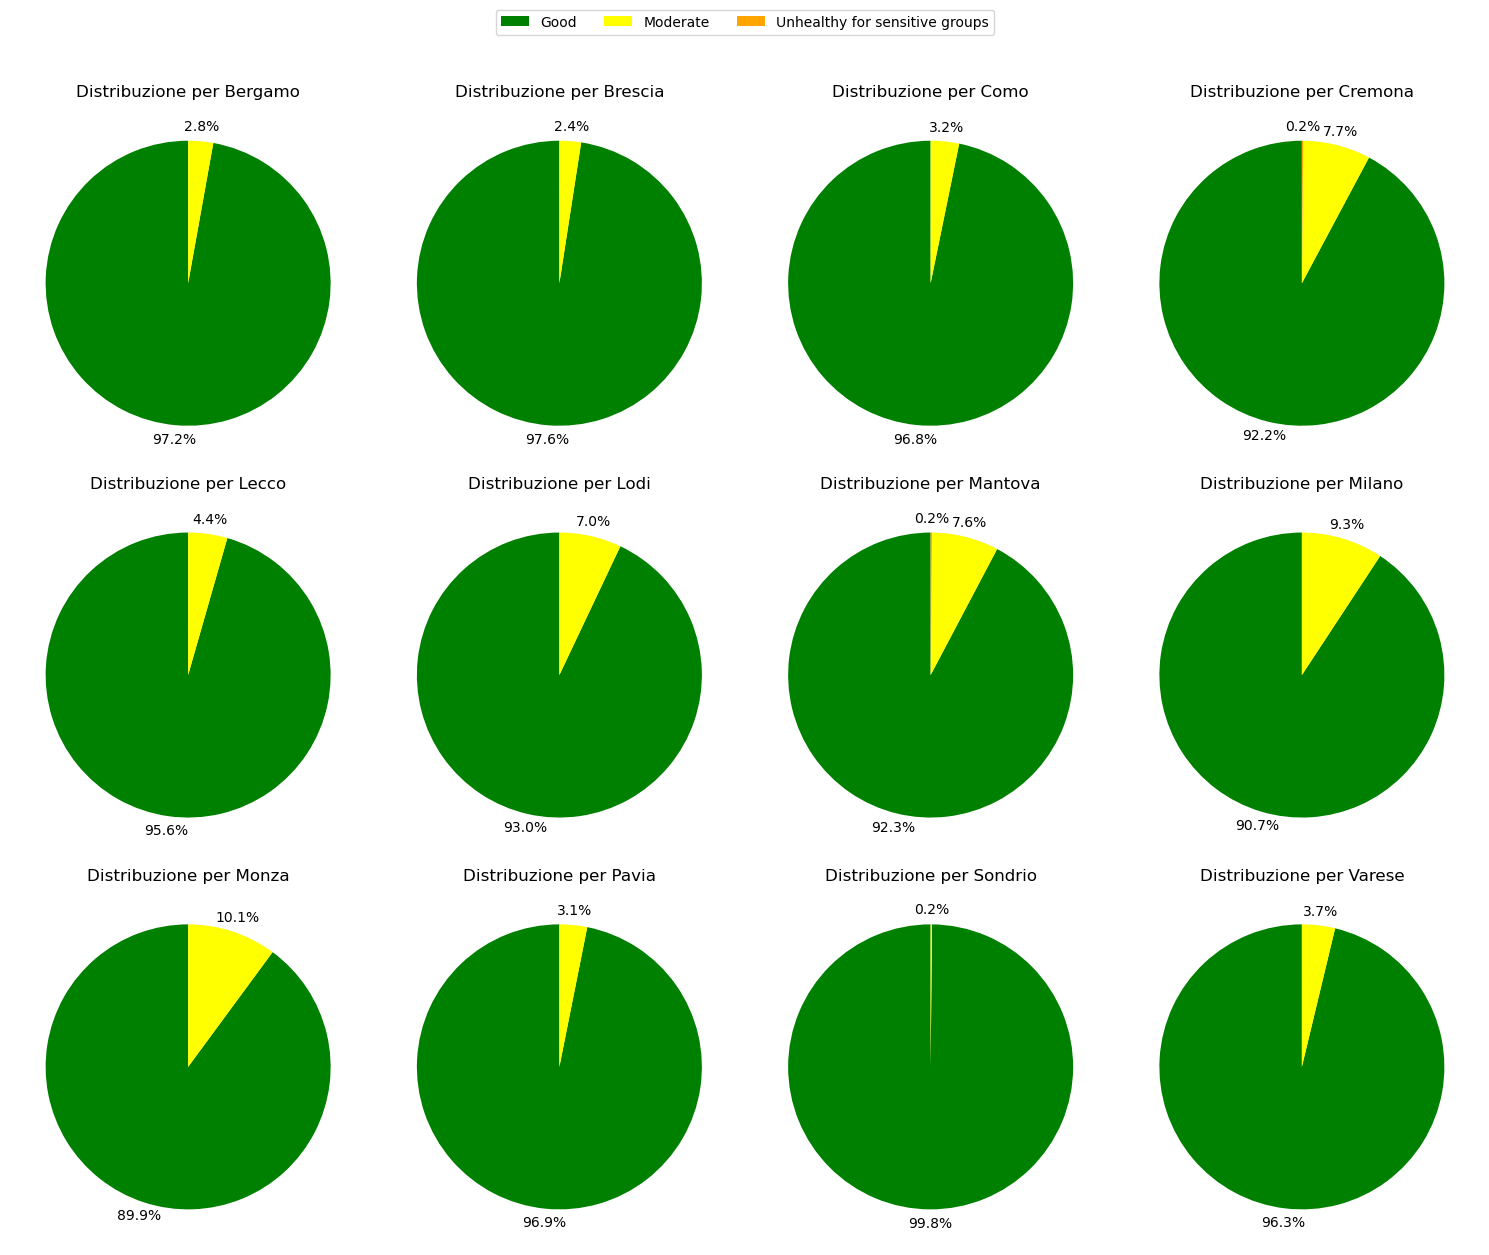

In [16]:
province_categories = new_X.groupby(['PROV', 'category']).size().unstack()
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 12))
# Create a pie chart for each province
for i, (province, ax) in enumerate(zip(province_categories.index, axes.flatten())):
    province_data = province_categories.loc[province]
    # Delete the categories with 0.0 percentage
    province_data_nonzero = province_data[province_data != 0]
    province_data_nonzero.plot(kind='pie', autopct=lambda p: f'{p:.1f}%' if p > 0 else '', startangle=90, pctdistance = 1.1, labels=None, colors=['green', 'yellow', 'orange', 'red', 'purple'], ax=ax)
    ax.set_title(f'Distribuzione per {province}')
    ax.set_ylabel('')
fig.legend(province_data_nonzero.index, loc="upper center", bbox_to_anchor=(0.5, 1.05), 
           ncol=len(province_data_nonzero), bbox_transform=plt.gcf().transFigure, borderaxespad=0.)
# Fix the layout to avoid figures overlap
plt.tight_layout()
plt.savefig(f'{IMAGES_PATH}/PieCharts.png')
plt.show()

In [17]:
pivoted_X = new_X.pivot(index='DATA', columns='PROV', values='AQI_1')
pivoted_X

PROV,Bergamo,Brescia,Como,Cremona,Lecco,Lodi,Mantova,Milano,Monza,Pavia,Sondrio,Varese
DATA,,,,,,,,,,,,
2018-01-01,23.40,22.66,23.38,23.68,22.92,24.84,21.03,30.22,31.41,22.02,24.74,23.32
2018-01-02,24.29,22.49,24.11,16.96,23.84,17.73,16.29,17.11,16.17,17.85,27.88,21.65
2018-01-03,24.51,22.40,24.24,14.66,24.86,15.09,16.93,15.76,15.77,17.87,28.83,21.95
2018-01-04,23.29,21.76,20.52,16.15,22.01,15.03,17.78,17.09,17.93,17.00,26.03,18.80
2018-01-05,24.98,24.70,23.12,29.97,22.15,31.12,29.38,38.87,37.30,29.78,21.38,26.40
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-27,28.13,27.96,28.72,28.80,29.10,30.06,29.00,29.39,28.48,30.66,25.17,28.37
2021-07-28,27.67,27.34,26.19,29.97,27.31,32.47,31.25,30.66,29.05,31.64,22.65,25.57
2021-07-29,35.03,33.15,33.12,33.08,35.29,35.82,33.70,31.25,34.11,33.50,28.68,31.56


In [18]:
pivoted_X.describe()

PROV,Bergamo,Brescia,Como,Cremona,Lecco,Lodi,Mantova,Milano,Monza,Pavia,Sondrio,Varese
count,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000,1307.000000
mean,31.950321,31.692303,32.038424,33.386301,32.319357,33.400497,33.074120,33.870681,34.496672,32.293236,28.232888,31.355440
std,8.851205,8.532828,9.219959,11.712337,9.624716,11.247129,11.531345,12.106344,12.585839,9.316378,7.054593,9.583487
min,12.530000,12.600000,9.910000,10.170000,11.540000,9.900000,8.430000,11.470000,11.730000,10.340000,11.700000,9.930000
25%,25.430000,25.640000,25.335000,25.880000,25.020000,25.890000,25.710000,25.660000,25.565000,26.065000,23.455000,24.640000
50%,31.240000,30.980000,31.260000,31.760000,31.350000,32.180000,31.690000,32.170000,32.470000,32.090000,27.980000,30.720000
75%,37.680000,37.265000,37.880000,38.180000,38.470000,38.815000,38.105000,39.475000,40.510000,37.970000,33.160000,37.130000
max,85.280000,76.330000,85.710000,102.360000,85.600000,95.420000,107.730000,97.310000,99.280000,90.090000,70.190000,86.280000


## CLASSIC KMEANS

In [19]:
new_X2 = new_X[['DATA','PROV', 'AQI_1']].copy()

In [20]:
wide_df = new_X2.groupby(['DATA','PROV']).sum().unstack().T.reset_index(level=0,drop=True)

In [21]:
wide_df

DATA,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10,...,2021-07-22,2021-07-23,2021-07-24,2021-07-25,2021-07-26,2021-07-27,2021-07-28,2021-07-29,2021-07-30,2021-07-31
PROV,,,,,,,,,,,,,,,,,,,,,
Bergamo,23.40,24.29,24.51,23.29,24.98,22.88,22.50,21.94,23.68,25.00,...,43.15,45.56,44.00,35.72,33.32,28.13,27.67,35.03,41.00,37.22
Brescia,22.66,22.49,22.40,21.76,24.70,22.16,21.71,24.70,24.55,24.74,...,41.42,42.84,43.06,37.08,31.25,27.96,27.34,33.15,39.14,36.76
Como,23.38,24.11,24.24,20.52,23.12,21.65,19.28,18.36,21.32,23.70,...,47.52,49.59,44.19,34.99,36.16,28.72,26.19,33.12,39.12,36.03
Cremona,23.68,16.96,14.66,16.15,29.97,32.07,23.84,22.97,23.33,24.17,...,38.03,45.31,38.26,37.71,33.74,28.80,29.97,33.08,36.35,36.11
Lecco,22.92,23.84,24.86,22.01,22.15,22.26,20.17,19.12,23.23,23.78,...,47.89,49.76,46.49,35.84,35.91,29.10,27.31,35.29,42.70,37.83
Lodi,24.84,17.73,15.09,15.03,31.12,33.53,24.25,20.45,19.69,22.95,...,38.95,45.85,38.15,37.48,35.05,30.06,32.47,35.82,35.65,38.25
Mantova,21.03,16.29,16.93,17.78,29.38,28.28,21.99,23.95,27.18,26.44,...,37.73,43.55,39.73,40.13,34.97,29.00,31.25,33.70,37.41,38.73
Milano,30.22,17.11,15.76,17.09,38.87,36.57,25.97,19.38,18.30,28.57,...,41.22,45.61,41.15,35.09,35.26,29.39,30.66,31.25,31.37,33.71
Monza,31.41,16.17,15.77,17.93,37.30,33.83,25.89,18.48,19.56,30.71,...,44.85,47.86,45.58,36.96,35.85,28.48,29.05,34.11,37.58,36.00


In [22]:
#Time series standardization
X2_normalized = StandardScaler().fit_transform(wide_df)

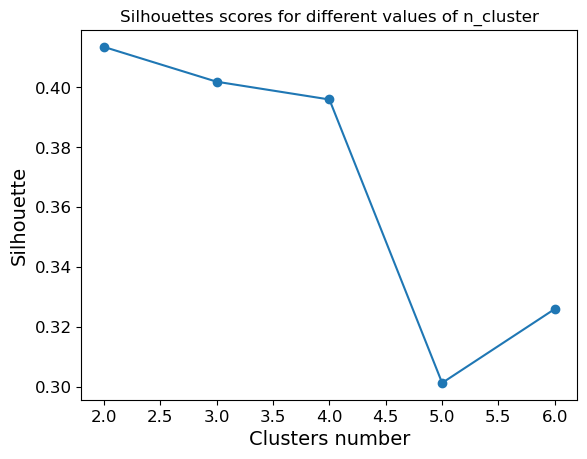

In [23]:
## silhouette scores 
silhouette_scores = []
n_clusters_range = range(2, 7)

for n_cluster in n_clusters_range:   
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)     
    kmeans.fit(X2_normalized)
    silhouette_coefficient = silhouette_score(wide_df, kmeans.labels_)
    silhouette_scores.append(silhouette_coefficient)

# Silhouette coefficients on clusters number 
plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Silhouette')
plt.title('Silhouettes scores for different values of n_cluster')
plt.savefig(f'{IMAGES_PATH}/Silhouette_5_2_A.png')
plt.show()

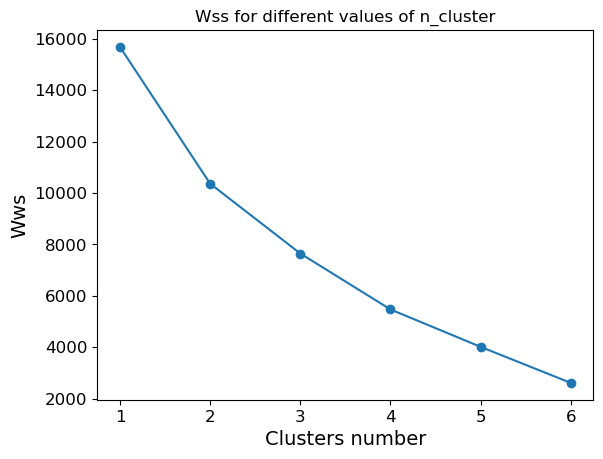

In [24]:
## WSS scores, within cluster squared sum
wss = []
n_clusters_range = range(1, 7)
for n_cluster in n_clusters_range:
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    kmeans.fit(X2_normalized)
    wss.append(kmeans.inertia_)

# Plot del valore WSS al variare del numero di cluster
plt.plot(n_clusters_range, wss, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Wws')
plt.title('Wss for different values of n_cluster')
plt.savefig(f'{IMAGES_PATH}/WSS_5_2_A.png')
plt.show()

Looking at those two measures we choose 2 clusters.

In [25]:
kmeans2 = KMeans(n_clusters=2, random_state=0)     
kmeans2.fit(X2_normalized)    
print(silhouette_score(wide_df, kmeans2.labels_))

0.4135651112088419


In [26]:
for cluster in range (kmeans2.n_clusters):
    print(f"Cluster {cluster}")
    cluster_data = wide_df[kmeans2.labels_ == cluster]
    for i in range(cluster_data.shape[0]):      
        print(cluster_data.index[i])   
    print()

Cluster 0
Cremona
Lodi
Mantova
Milano
Monza

Cluster 1
Bergamo
Brescia
Como
Lecco
Pavia
Sondrio
Varese



In [27]:
from tabulate import tabulate
table1 = [['Clusters', 'Provinces'],
          ['0', 'Mantova, ' 'Lodi, ' 'Cremona,' ' Milano, ' 'Monza,'' Pavia '],
          ['1', 'Lecco, ' 'Varese, ' 'Como, ''Brescia, ''Bergamo,'' Sondrio' ]]
print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤════════════════════════════════════════════════╕
│   Clusters │ Provinces                                      │
╞════════════╪════════════════════════════════════════════════╡
│          0 │ Mantova, Lodi, Cremona, Milano, Monza, Pavia   │
├────────────┼────────────────────────────────────────────────┤
│          1 │ Lecco, Varese, Como, Brescia, Bergamo, Sondrio │
╘════════════╧════════════════════════════════════════════════╛


## TIME SERIES KMEANS

In [28]:
# Time series standardization with TimeSeriesScalerMeanVariance
X_normalized = TimeSeriesScalerMeanVariance().fit_transform(wide_df)

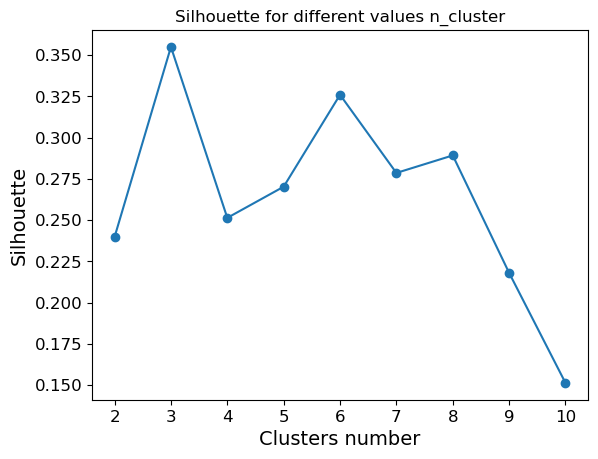

In [29]:
silhouette_scores = []
n_clusters_range = range(2, 11)

for n_cluster in n_clusters_range:   
    kmeans = TimeSeriesKMeans(n_clusters=n_cluster, random_state=0, metric='dtw')     
    kmeans.fit(X_normalized)
    silhouette_coefficient = silhouette_score(wide_df, kmeans.labels_)
    silhouette_scores.append(silhouette_coefficient)

plt.plot(n_clusters_range, silhouette_scores, marker='o')
plt.xlabel('Clusters number')
plt.ylabel('Silhouette')
plt.title('Silhouette for different values n_cluster')
plt.savefig(f'{IMAGES_PATH}/Silhouette_5_2_B.png')
plt.show()
# The silhouette score evaluates the goodness of the split of the clusters
# Is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation)

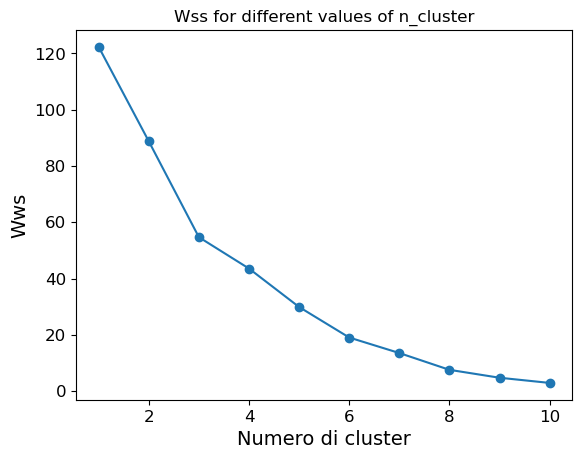

In [30]:
wss = []
n_clusters_range = range(1, 11)
for n_cluster in n_clusters_range:
    kmeans = TimeSeriesKMeans(n_clusters=n_cluster, random_state=0, metric = 'dtw')
    kmeans.fit(X_normalized)
    wss.append(kmeans.inertia_)

plt.plot(n_clusters_range, wss, marker='o')
plt.xlabel('Numero di cluster')
plt.ylabel('Wws')
plt.title('Wss for different values of n_cluster')
plt.savefig(f'{IMAGES_PATH}/Wss_5_2_B.png')
plt.show()
#Within cluster sum of squares, within variance.

### In this case silhouette and wss confirm us the same thing: 3 clusters.

In [31]:
kmeans = TimeSeriesKMeans(n_clusters=3, random_state=0, metric='dtw')     
kmeans.fit(X_normalized)  

TimeSeriesKMeans(metric='dtw', random_state=0)

In [32]:
for cluster in range (kmeans.n_clusters):
    print(f"Cluster {cluster}")
    cluster_data = wide_df[kmeans.labels_ == cluster]
    for i in range(cluster_data.shape[0]):      
        print(cluster_data.index[i])   
    print()

Cluster 0
Cremona
Lodi
Mantova
Milano
Monza
Pavia

Cluster 1
Sondrio

Cluster 2
Bergamo
Brescia
Como
Lecco
Varese



In [33]:
from tabulate import tabulate
table1 = [['Clusters', 'Provinces'],
          ['0', 'Mantova, ' 'Lodi, ' 'Cremona,' ' Milano, ' 'Monza,'' Pavia '],
          ['1', 'Lecco, ' 'Varese, ' 'Como, ''Brescia, ''Bergamo' ],
          ['2', 'Sondrio']]
print(tabulate(table1, headers='firstrow', tablefmt='fancy_grid'))

╒════════════╤══════════════════════════════════════════════╕
│   Clusters │ Provinces                                    │
╞════════════╪══════════════════════════════════════════════╡
│          0 │ Mantova, Lodi, Cremona, Milano, Monza, Pavia │
├────────────┼──────────────────────────────────────────────┤
│          1 │ Lecco, Varese, Como, Brescia, Bergamo        │
├────────────┼──────────────────────────────────────────────┤
│          2 │ Sondrio                                      │
╘════════════╧══════════════════════════════════════════════╛


In [34]:
cluster_labels = kmeans.labels_
silhouette_avg = silhouette_score(wide_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")
print(f"Wss: {kmeans.inertia_}")

Silhouette Score: 0.35495740504203876
Wss: 54.684193540170206


In [35]:
## settings for graphs below
import matplotlib.patches as mpatches
from collections import OrderedDict
# Mappings between provinces and clusters
province_cluster_mapping = {
    'Cremona': 0, 'Lodi': 0, 'Mantova': 0, 'Milano': 0, 'Monza': 0, 'Pavia': 0,
    'Como': 1, 'Lecco': 1, 'Varese': 1,  'Bergamo': 1, 'Brescia': 1,
    'Sondrio': 2,
}
colors = ['red', 'green', 'blue']
# Create a dictionary with the colors and provinces
province_colors = {}
for province in pivoted_X.columns:
    cluster = province_cluster_mapping.get(province, -1)
    color = colors[cluster]
    province_colors[province] = mpatches.Patch(color=color)
# Sort the dictionary by colors and provinces
sorted_province_colors = OrderedDict(sorted(province_colors.items(), key=lambda x: province_cluster_mapping.get(x[0], -1)))

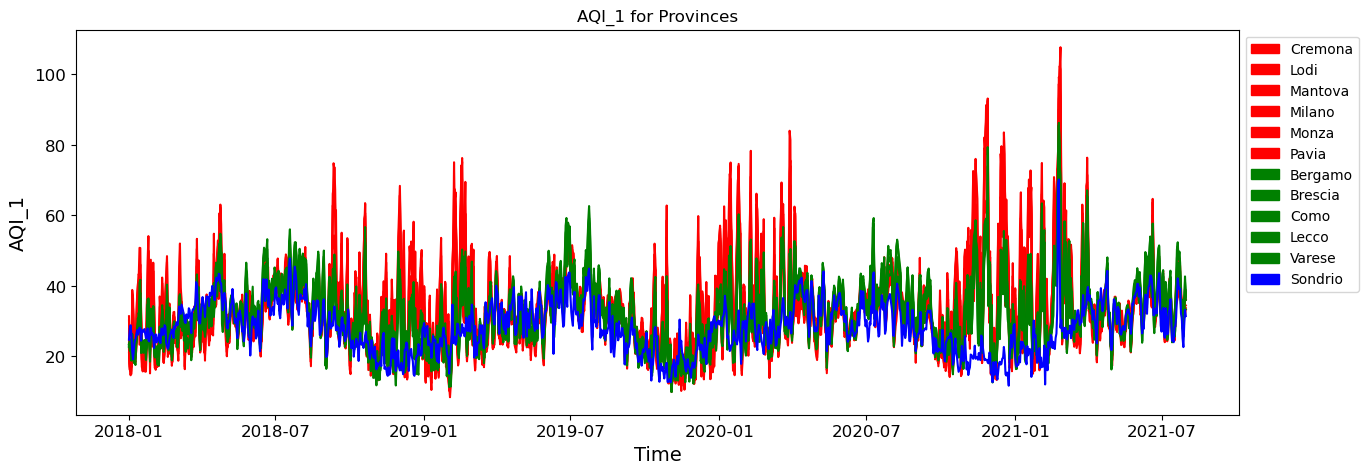

In [36]:
# Plot a line for each provinces with colors based on clusters
plt.figure(figsize=(15, 5))
for province, color_patch in sorted_province_colors.items():
    plt.plot(pivoted_X.index, pivoted_X[province], label=province, color=color_patch.get_facecolor())
    
plt.title("AQI_1 for Provinces")
plt.xlabel("Time")
plt.ylabel("AQI_1")

# sorted legend
plt.legend(handles=list(sorted_province_colors.values()), labels=list(sorted_province_colors.keys()),
           loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig(f'{IMAGES_PATH}/TIME_KM_1.png')
plt.show()

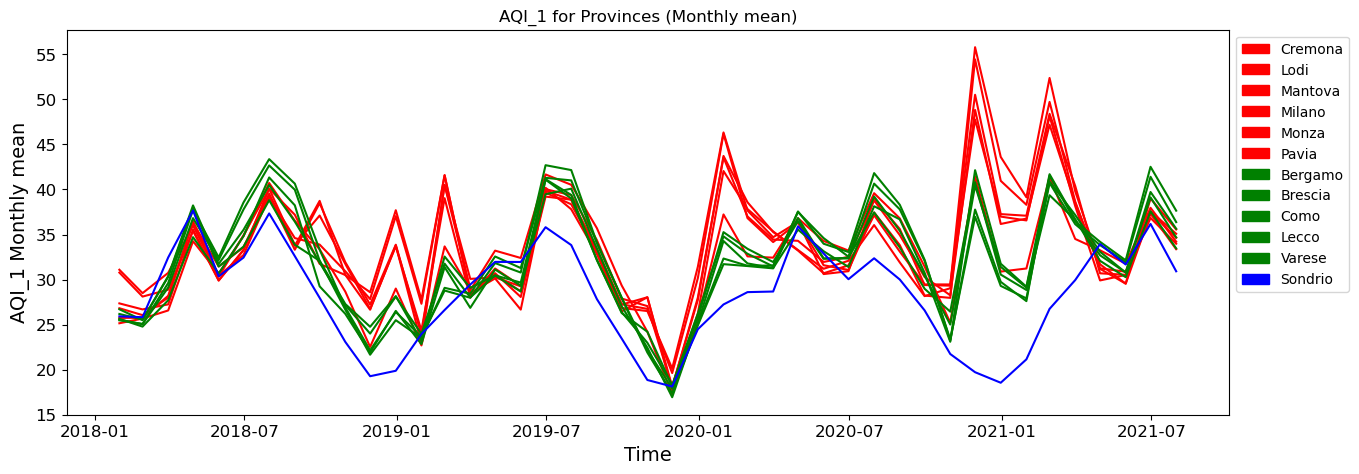

In [37]:
# monthly mean
plt.figure(figsize=(15, 5))
for province, color_patch in sorted_province_colors.items():
    #using resample to compute monthly mean
    monthly_mean = pivoted_X[province].resample('1M').mean()
    plt.plot(monthly_mean.index, monthly_mean, label=province, color=color_patch.get_facecolor())

plt.title("AQI_1 for Provinces (Monthly mean)")
plt.xlabel("Time")
plt.ylabel("AQI_1 Monthly mean")

plt.legend(handles=list(sorted_province_colors.values()), labels=list(sorted_province_colors.keys()), loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig(f'{IMAGES_PATH}/TIME_KM_2.png')
plt.show()

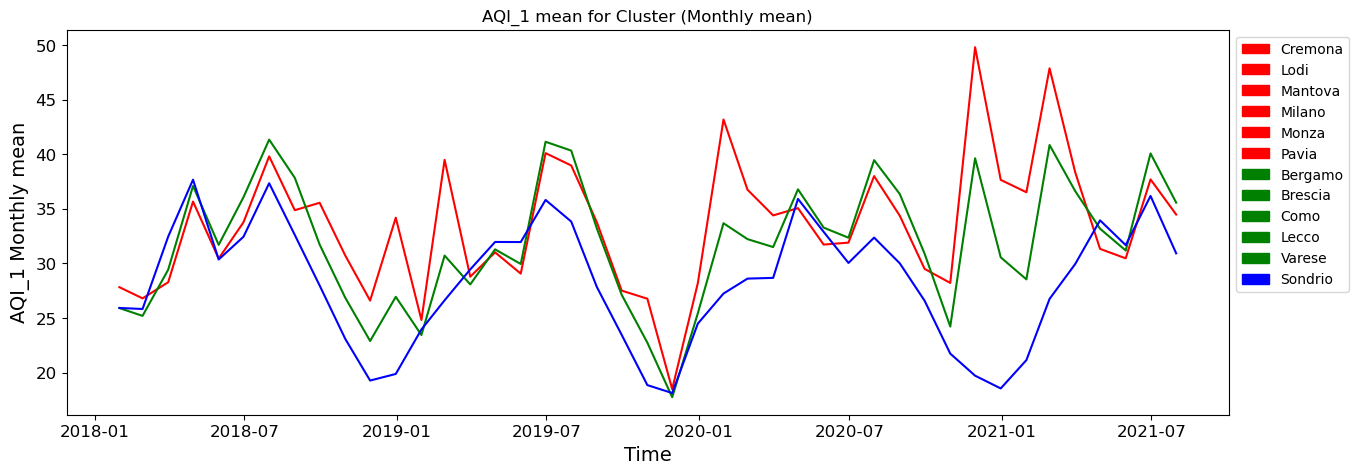

In [38]:
cluster_means = pivoted_X.groupby(lambda x: province_cluster_mapping[x], axis=1).mean()
colors = ['red', 'green', 'blue']
plt.figure(figsize=(15, 5))
for i, cluster_mean in enumerate(cluster_means.columns):
    # media mensile
    monthly_mean = cluster_means[cluster_mean].resample('1M').mean()
    plt.plot(monthly_mean.index, monthly_mean, label=f'Cluster {i}', color=colors[i])
plt.title("AQI_1 mean for Cluster (Monthly mean)")
plt.xlabel("Time")
plt.ylabel("AQI_1 Monthly mean")
#plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.legend(handles=list(sorted_province_colors.values()), labels=list(sorted_province_colors.keys()), loc="upper left", bbox_to_anchor=(1, 1))
plt.savefig(f'{IMAGES_PATH}/TIME_KM_3.png')
plt.show()